In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
%pylab inline
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Populating the interactive namespace from numpy and matplotlib
height has been deprecated.



# Main questions: Which commonly known batting stats (pre-season) has highest impact on salary?  How is the impact in context of average salary?
Strategy: 
1. Create dataframe 
    -Focus on batting metrics that are typically displayed in baseball games, on TV
      - BA : (Hits/At bats). Using pandas to create H/AB columns in batting dataframe
      - HR : homerun
      - RBI : RBI
      - SO : strikeout
      - BB : walk
      
2. Statistical test
    - use Pearson's R test to find the magnitude of correlation between the above stats and salary.

3. Plotting batting stats v.s. salary 
    - Plot to visualize the above batting stats' correlation with salary


# Creating dataframe for batting (pre-season)

In [179]:
#function for reading csv files into dataframe
def read_csv(filename):
    reader = pd.read_csv(filename)
    return reader

Read files for batting and salary

In [180]:
batting = read_csv('Batting.csv' )
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,0.0,0.0,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,5.0,0.0,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,2.0,2.0,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,3.0,0.0,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [181]:
salaries = read_csv('Salaries.csv' )
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


# Creating a column in the dataframe for players' batting average

Plan
1. creating a new 'BA'(batting average) column, and use groupby() to group players.
2. merging salaries dataframe and batting dataframe (with batting average) using playerID that is common to the list salaries. 

In [182]:
#Insert new 'BA' column
batting ['BA'] = batting['H']/batting['AB']
batting.head() # after looking at batting as a whole, records with 'NaN' BA is due to 0.0 H/0.0 AB

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,0.0,0.0,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,0.271186
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,5.0,0.0,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,0.291971
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,2.0,2.0,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,0.330827
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,3.0,0.0,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,0.325000


Limit the batting dataframe to a subset of player within the last 5 years (2010-2015)

In [183]:
select_batting_last5yrs = batting['yearID'] >=2010
batting_last5yrs = batting [select_batting_last5yrs]
batting_last5yrs.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
92849,aardsda01,2010,1,SEA,AL,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
92850,abadfe01,2010,1,HOU,NL,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
92851,abreubo01,2010,1,LAA,AL,154,573.0,88.0,146.0,41.0,1.0,20.0,78.0,24.0,10.0,87.0,132.0,3.0,2.0,0.0,5.0,13.0,0.254799
92852,abreuto01,2010,1,ARI,NL,81,193.0,16.0,45.0,11.0,1.0,1.0,13.0,2.0,1.0,4.0,47.0,0.0,0.0,0.0,4.0,8.0,0.233161
92853,accarje01,2010,1,TOR,AL,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Get rid of BA row that is NaN or 0.00, which is due to player haveing 0.0 H or 0.0 AB

In [184]:
batting_last5yrs_1stcleanBA = batting_last5yrs[batting_last5yrs.BA != 0]
batting_last5yrs_2ndcleanBA = batting_last5yrs_1stcleanBA[np.isfinite(batting_last5yrs_1stcleanBA['BA'])]
batting_last5yrs_2ndcleanBA.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
92851,abreubo01,2010,1,LAA,AL,154,573.0,88.0,146.0,41.0,1.0,20.0,78.0,24.0,10.0,87.0,132.0,3.0,2.0,0.0,5.0,13.0,0.254799
92852,abreuto01,2010,1,ARI,NL,81,193.0,16.0,45.0,11.0,1.0,1.0,13.0,2.0,1.0,4.0,47.0,0.0,0.0,0.0,4.0,8.0,0.233161
92860,aldrico01,2010,1,LAA,AL,5,13.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.076923
92861,alfonel01,2010,1,SEA,AL,13,41.0,4.0,9.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,2.0,0.219512
92862,allenbr01,2010,1,ARI,NL,22,45.0,5.0,12.0,3.0,0.0,1.0,6.0,0.0,0.0,10.0,20.0,1.0,0.0,0.0,1.0,0.0,0.266667


Select only players with ABs higher than populations average, to get rid of possible pitchers and pinch hitters.


In [185]:
mean_AB = batting_last5yrs_2ndcleanBA['AB'].mean()

finalcleanBA = batting_last5yrs_2ndcleanBA['AB'] >= mean_AB

batting_last5yrs_finalcleanBA = batting_last5yrs_2ndcleanBA[finalcleanBA]
batting_last5yrs_finalcleanBA.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
92851,abreubo01,2010,1,LAA,AL,154,573.0,88.0,146.0,41.0,1.0,20.0,78.0,24.0,10.0,87.0,132.0,3.0,2.0,0.0,5.0,13.0,0.254799
92864,alvarpe01,2010,1,PIT,NL,95,347.0,42.0,89.0,21.0,1.0,16.0,64.0,0.0,0.0,37.0,119.0,1.0,0.0,0.0,2.0,8.0,0.256484
92871,andruel01,2010,1,TEX,AL,148,588.0,88.0,156.0,15.0,3.0,0.0,35.0,32.0,15.0,64.0,96.0,0.0,5.0,17.0,0.0,6.0,0.265306
92884,avilaal01,2010,1,DET,AL,104,294.0,28.0,67.0,12.0,0.0,7.0,31.0,2.0,2.0,36.0,71.0,0.0,2.0,1.0,0.0,12.0,0.227891
92885,avilemi01,2010,1,KCA,AL,110,424.0,63.0,129.0,16.0,3.0,8.0,32.0,14.0,5.0,20.0,49.0,0.0,1.0,0.0,3.0,13.0,0.304245


# Create new salary list for players within the last 5  years (2010-2015)

In [186]:
select_salaries_last5yrs = salaries['yearID'] >=2010
salaries_last5yrs = salaries [select_salaries_last5yrs]
salaries_last5yrs.head()

,yearID,teamID,lgID,playerID,salary
20624,2010,ARI,NL,abreuto01,407000
20625,2010,ARI,NL,boyerbl01,725000
20626,2010,ARI,NL,drewst01,3400000
20627,2010,ARI,NL,gutieju01,411000
20628,2010,ARI,NL,harenda01,8250000


### Merge batting_n_salaries_last5yrs and salaries_last5yrs.merge dataframe to add playerID-specific and yearID-specific to create a dataframe with both players' batting statistics and their salary.

In [187]:
batting_n_salaries_last5yrs = salaries_last5yrs.merge(batting_last5yrs_finalcleanBA, on=['playerID', 'yearID'], how='inner')
batting_n_salaries_last5yrs.head()


,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
0,2010,ARI,NL,drewst01,3400000,1,ARI,NL,151,565.0,83.0,157.0,33.0,12.0,15.0,61.0,10.0,5.0,62.0,108.0,2.0,3.0,2.0,1.0,7.0,0.277876
1,2010,ARI,NL,johnske05,2350000,1,ARI,NL,154,585.0,93.0,166.0,36.0,5.0,26.0,71.0,13.0,7.0,79.0,148.0,1.0,2.0,3.0,2.0,12.0,0.283761
2,2010,ARI,NL,larocad01,4500000,1,ARI,NL,151,560.0,75.0,146.0,37.0,2.0,25.0,100.0,0.0,1.0,48.0,172.0,4.0,3.0,0.0,4.0,8.0,0.260714
3,2010,ARI,NL,montemi01,2000000,1,ARI,NL,85,297.0,36.0,79.0,20.0,2.0,9.0,43.0,0.0,1.0,29.0,71.0,3.0,2.0,0.0,3.0,10.0,0.265993
4,2010,ARI,NL,parrage01,405500,1,ARI,NL,133,364.0,31.0,95.0,19.0,6.0,3.0,30.0,1.0,0.0,23.0,76.0,10.0,2.0,3.0,1.0,8.0,0.260989


In [188]:
#verify the merged list 'batting_n_salaries_last5yrs' for salary and playerID
select_drew = batting_n_salaries_last5yrs['playerID'] == 'drewst01'
test_drew = batting_n_salaries_last5yrs[select_drew]
test_drew

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
0,2010,ARI,NL,drewst01,3400000,1,ARI,NL,151,565.0,83.0,157.0,33.0,12.0,15.0,61.0,10.0,5.0,62.0,108.0,2.0,3.0,2.0,1.0,7.0,0.277876
295,2011,ARI,NL,drewst01,4650000,1,ARI,NL,86,321.0,44.0,81.0,21.0,5.0,5.0,45.0,4.0,4.0,30.0,74.0,0.0,1.0,1.0,1.0,3.0,0.252336
915,2013,BOS,AL,drewst01,9500000,1,BOS,AL,124,442.0,57.0,112.0,29.0,8.0,13.0,67.0,6.0,0.0,54.0,124.0,3.0,1.0,0.0,4.0,9.0,0.253394
1635,2015,NYA,AL,drewst01,5000000,1,NYA,AL,131,383.0,43.0,77.0,16.0,1.0,17.0,44.0,0.0,2.0,37.0,71.0,1.0,1.0,4.0,3.0,7.0,0.201044


###Observed general statistics for the batting/salary (within the last 5 years) dataframe.

In [189]:
batting_n_salaries_last5yrs.describe()

,yearID,salary,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
count,1762.000000,1.762000e+03,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.00000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.00000,1762.000000
mean,2012.484109,5.050967e+06,1.024404,121.410897,420.223610,54.832009,111.038593,22.039160,2.241203,12.883087,52.84790,7.788309,2.909762,39.025539,85.479001,3.092509,4.134506,1.860386,3.393871,9.54143,0.260249
std,1.702464,5.662530e+06,0.157980,28.771067,130.776456,23.584231,41.230983,9.577334,2.394923,9.270799,25.01113,9.808039,3.048040,20.552143,35.221597,3.921860,3.645345,2.786931,2.300366,5.42438,0.031627
min,2010.000000,4.000000e+05,1.000000,51.000000,200.000000,4.000000,31.000000,2.000000,0.000000,0.000000,8.00000,0.000000,0.000000,4.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.146018
25%,2011.000000,5.171250e+05,1.000000,99.000000,304.000000,36.000000,76.000000,14.250000,0.000000,6.000000,33.00000,1.000000,1.000000,23.000000,59.000000,1.000000,2.000000,0.000000,2.000000,6.00000,0.239416
50%,2012.000000,2.750000e+06,1.000000,126.000000,422.500000,53.000000,109.000000,21.000000,2.000000,11.000000,49.00000,4.000000,2.000000,35.000000,81.500000,2.000000,3.000000,1.000000,3.000000,9.00000,0.260425
75%,2014.000000,7.500000e+06,1.000000,147.000000,535.750000,72.000000,144.000000,29.000000,3.000000,18.000000,70.00000,11.000000,4.000000,51.000000,106.000000,4.000000,6.000000,3.000000,5.000000,13.00000,0.281879
max,2015.000000,3.300000e+07,3.000000,162.000000,684.000000,136.000000,225.000000,55.000000,16.000000,54.000000,139.00000,68.000000,23.000000,143.000000,222.000000,38.000000,30.000000,19.000000,12.000000,32.00000,0.362140


# Using Pearson's R to find the magnitude of correlation between batting metrices and salary

In [192]:
#function to find the given average values of specific players
def group_playerID_values (value):
    z = batting_n_salaries_last5yrs
    return z.groupby('playerID').mean()[value]

player_salary = group_playerID_values('salary')
player_BA = group_playerID_values('BA')
player_HR = group_playerID_values('HR')
player_RBI = group_playerID_values('RBI')
player_SO = group_playerID_values('SO')
player_BB = group_playerID_values('BB')

#function for Pearson's R test
def correlation(x, y):
    return (((x-x.mean())/x.std(ddof=0)) * ((y-y.mean())/y.std(ddof=0))).mean()

Rvalue_salary_and_BA = correlation(player_salary, player_BA)
Rvalue_salary_and_HR = correlation(player_salary, player_HR)
Rvalue_salary_and_RBI = correlation(player_salary, player_RBI)
Rvalue_salary_and_BB = correlation(player_salary, player_BB)
Rvalue_salary_and_SO = correlation(player_salary, player_SO)





print "Pearson's R values:"
print ""
print 'salary and BA:', Rvalue_salary_and_BA
print ""
print 'salary and HR:', Rvalue_salary_and_HR
print ""
print 'salary and RBI:', Rvalue_salary_and_RBI
print ""
print 'salary and BB:', Rvalue_salary_and_BB
print ""
print 'salary and SO:', Rvalue_salary_and_SO


Pearson's R values:

salary and BA: 0.284833952637

salary and HR: 0.427740300265

salary and RBI: 0.497880404076

salary and BB: 0.419211073439

salary and SO: 0.134789586788


##<font color='red'>Testing the significance of Pearson's R values

###<font color='red'>Using the following formula: t* = r√(n−2) / (√(1−r^2)), per the following URL: [https://onlinecourses.science.psu.edu/stat501/node/259]
###<font color='red'>Where r = Pearson's r

###Finding the n for t test below

In [195]:
print len(batting_n_salaries_last5yrs['playerID'])

1762


In [196]:
#function for obtaining t value for Pearson's R values
def correlation_sig_test(r):
    sqrtA = math.sqrt(1760)
    sqrtB = math.sqrt(1-(r**2))
    return (r * sqrtA)/sqrtB

###<font color='red'>Calculate t values for salary/batting stats R values
>###<font color='red'>Null hypothesis is existence of correlation (rho): rho = 0
>###<font color='red'>Alternate hypothesis: rho ≠ 0

In [197]:
print "t value for Rvalue_salary_and_BA = ", correlation_sig_test(Rvalue_salary_and_BA)
print "t value for Rvalue_salary_and_HR = ", correlation_sig_test(Rvalue_salary_and_HR)
print "t value for Rvalue_salary_and_RBI = ", correlation_sig_test(Rvalue_salary_and_RBI)
print "t value for Rvalue_salary_and_BB = ", correlation_sig_test(Rvalue_salary_and_BB)
print "t value for Rvalue_salary_and_SO = ", correlation_sig_test(Rvalue_salary_and_SO)

t value for Rvalue_salary_and_BA =  12.4658283974
t value for Rvalue_salary_and_HR =  19.8525049678
t value for Rvalue_salary_and_RBI =  24.0845874911
t value for Rvalue_salary_and_BB =  19.3711953421
t value for Rvalue_salary_and_SO =  5.70681949318


###<font color='red'>Results of t test for salary/batting stats R values: 
>###<font color='red'>Null hypothesis is rejected for all R values above since t critical value for 1780 degree of freedom 
>###<font color='red'>for .025 p value(two-tailed test) is between 1.960 and 1.962
>###<font color='red'>Thus, all correlations above are significance

##Conclusion 1:
>###Using Pearson's R test and t test it is found that the correlation of the tested batting stats to salary are <font color='red'> significant (p = 0.05), and are ranked as follows: RBI > HR > BB > BA > SO.  This does not indicate that having higher said stat in isolation will directly result in higher salary, since other stats are not constant for each player while this analysis was performed, as well as unforseen events not detected in our data/tests.
>###In addition, using average batting stats and salary may not be the best approach, however, since there may be aforementioned event(s) that seemingly can disrupt the correlation, e.g. poor performance after a salary raise.  Another approach attempting to address this question will be presented below.

# Plotting average batting matrices v.s. average salary

##<font color='red'>Using scatter plot to visualize correlations

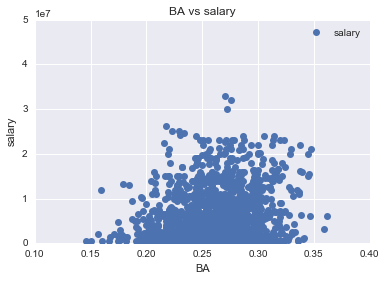

In [198]:
axs5yrsBA = batting_n_salaries_last5yrs.plot(x='BA', y='salary', style='o')

axs5yrsBA.set_ylim(100000,50000000)
axs5yrsBA.set_xlim(0.10,0.4)
axs5yrsBA.set_ylabel("salary")
axs5yrsBA.set_title('BA vs salary')

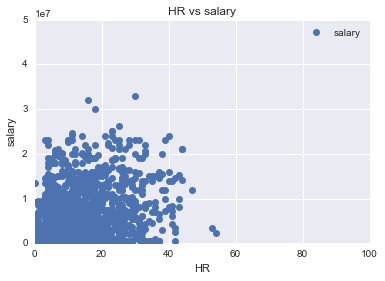

In [199]:
axs5yrsHR = batting_n_salaries_last5yrs.plot(x='HR', y='salary', style='o')

axs5yrsHR.set_ylim(100000,50000000)
axs5yrsHR.set_xlim(0,100)
axs5yrsHR.set_ylabel("salary")
axs5yrsHR.set_title('HR vs salary')

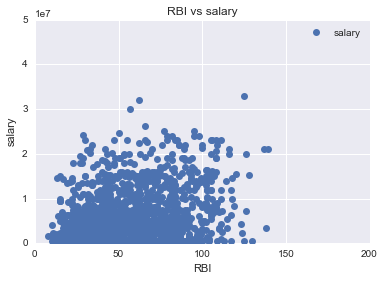

In [200]:
axs5yrsRBI = batting_n_salaries_last5yrs.plot(x='RBI', y='salary', style='o')

axs5yrsRBI.set_ylim(100000,50000000)
axs5yrsRBI.set_xlim(0,200)
axs5yrsRBI.set_ylabel("salary")
axs5yrsRBI.set_title('RBI vs salary')

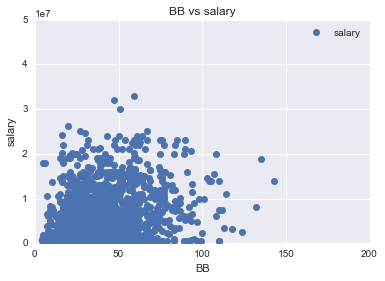

In [201]:
axs5yrsBB = batting_n_salaries_last5yrs.plot(x='BB', y='salary', style='o')

axs5yrsBB.set_ylim(100000,50000000)
axs5yrsBB.set_xlim(0,200)
axs5yrsBB.set_ylabel("salary")
axs5yrsBB.set_title('BB vs salary')

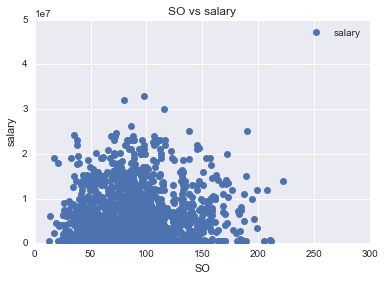

In [202]:
axs5yrsSO = batting_n_salaries_last5yrs.plot(x='SO', y='salary', style='o')

axs5yrsSO.set_ylim(100000,50000000)
axs5yrsSO.set_xlim(0,300)
axs5yrsSO.set_ylabel("salary")
axs5yrsSO.set_title('SO vs salary')

##Need to resolve the scoatter plots above, although the scatter plot suggests that the correlation is positive for salary and all batting stats.
> ###Strategy: Try using qcut() funciton to bin the batting stats to resolve the plots above. 
> ###Bin BA, then average salary per that Bin > plot with average salary line as a reference.


In [203]:
#function for binning bating stats
def binning(data):
        return pd.qcut(data, [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['5th', '4th', '3rd', '2nd', '1st'])
batting_n_salaries_last5yrs['BAbin'] = binning(batting_n_salaries_last5yrs['BA'])
batting_n_salaries_last5yrs['HRbin'] = binning(batting_n_salaries_last5yrs['HR'])
batting_n_salaries_last5yrs['RBIbin'] = binning(batting_n_salaries_last5yrs['RBI'])
batting_n_salaries_last5yrs['BBbin'] = binning(batting_n_salaries_last5yrs['BB'])
batting_n_salaries_last5yrs['SObin'] = binning(batting_n_salaries_last5yrs['SO'])


batting_n_salaries_last5yrs.head()

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA,BAbin,HRbin,RBIbin,BBbin,SObin
0,2010,ARI,NL,drewst01,3400000,1,ARI,NL,151,565.0,83.0,157.0,33.0,12.0,15.0,61.0,10.0,5.0,62.0,108.0,2.0,3.0,2.0,1.0,7.0,0.277876,2nd,2nd,2nd,1st,2nd
1,2010,ARI,NL,johnske05,2350000,1,ARI,NL,154,585.0,93.0,166.0,36.0,5.0,26.0,71.0,13.0,7.0,79.0,148.0,1.0,2.0,3.0,2.0,12.0,0.283761,2nd,1st,2nd,1st,1st
2,2010,ARI,NL,larocad01,4500000,1,ARI,NL,151,560.0,75.0,146.0,37.0,2.0,25.0,100.0,0.0,1.0,48.0,172.0,4.0,3.0,0.0,4.0,8.0,0.260714,3rd,1st,1st,2nd,1st
3,2010,ARI,NL,montemi01,2000000,1,ARI,NL,85,297.0,36.0,79.0,20.0,2.0,9.0,43.0,0.0,1.0,29.0,71.0,3.0,2.0,0.0,3.0,10.0,0.265993,3rd,4th,3rd,4th,4th
4,2010,ARI,NL,parrage01,405500,1,ARI,NL,133,364.0,31.0,95.0,19.0,6.0,3.0,30.0,1.0,0.0,23.0,76.0,10.0,2.0,3.0,1.0,8.0,0.260989,3rd,5th,5th,4th,3rd


###<font color='red'>Use binned values to plot (dot plot).  The average salary for the whole population is depicted by the blue line.

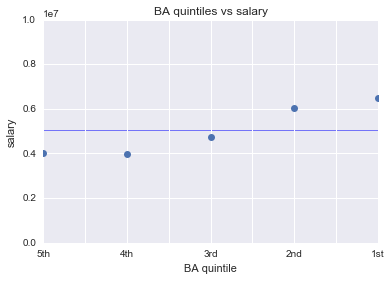

In [208]:
salaryBAbinaxs = batting_n_salaries_last5yrs.groupby('BAbin').mean()['salary']
axsBAbin = salaryBAbinaxs.plot(x='BAbin', y='salary', style='o')

mean_salary = batting_n_salaries_last5yrs.mean()['salary']

axsBAbin.set_ylim(000000,10000000)
axsBAbin.set_xlabel("BA quintile")
axsBAbin.set_ylabel("salary")
axsBAbin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)

axsBAbin.set_title('BA quintiles vs salary')

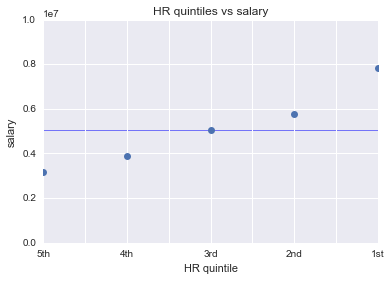

In [209]:
salaryHRbinaxs = batting_n_salaries_last5yrs.groupby('HRbin').mean()['salary']
#BAbingroup = batting_n_salaries_last5yrs.groupby('BAbin', as_index=False)
axsHRbin = salaryHRbinaxs.plot(x='HRbin', y='salary', style='o')

axsHRbin.set_ylim(000000,10000000)
axsHRbin.set_xlabel("HR quintile")
axsHRbin.set_ylabel("salary")
axsHRbin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsHRbin.set_title('HR quintiles vs salary')

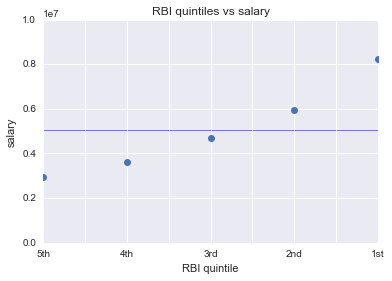

In [210]:
salaryRBIbinaxs = batting_n_salaries_last5yrs.groupby('RBIbin').mean()['salary']
#BAbingroup = batting_n_salaries_last5yrs.groupby('BAbin', as_index=False)
axsRBIbin = salaryRBIbinaxs.plot(x='RBIbin', y='salary', style='o')

axsRBIbin.set_ylim(000000,10000000)
axsRBIbin.set_xlabel("RBI quintile")
axsRBIbin.set_ylabel("salary")
axsRBIbin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsRBIbin.set_title('RBI quintiles vs salary')

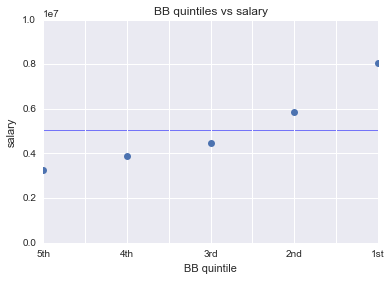

In [211]:
salaryBBbinaxs = batting_n_salaries_last5yrs.groupby('BBbin').mean()['salary']
#BAbingroup = batting_n_salaries_last5yrs.groupby('BAbin', as_index=False)
axsBBbin = salaryBBbinaxs.plot(x='BBbin', y='salary', style='o')

axsBBbin.set_ylim(000000,10000000)
axsBBbin.set_xlabel("BB quintile")
axsBBbin.set_ylabel("salary")
axsBBbin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsBBbin.set_title('BB quintiles vs salary')

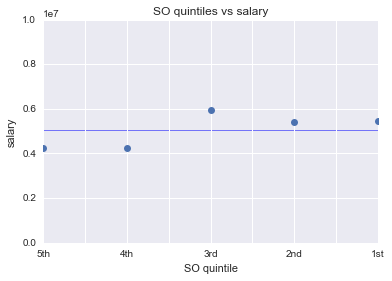

In [212]:
salarySObinaxs = batting_n_salaries_last5yrs.groupby('SObin').mean()['salary']
#BAbingroup = batting_n_salaries_last5yrs.groupby('BAbin', as_index=False)
axsSObin = salarySObinaxs.plot(x='SO', y='salary', style='o')

axsSObin.set_ylim(000000,10000000)
axsSObin.set_xlabel("SO quintile")
axsSObin.set_ylabel("salary")
axsSObin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsSObin.set_title('SO quintiles vs salary')

###<font color='red'> Use binned values to plot (box plot)

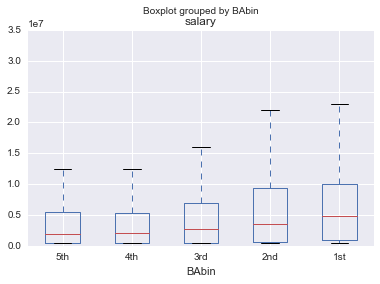

In [213]:
batting_n_salaries_last5yrs.boxplot(column='salary', by='BAbin')

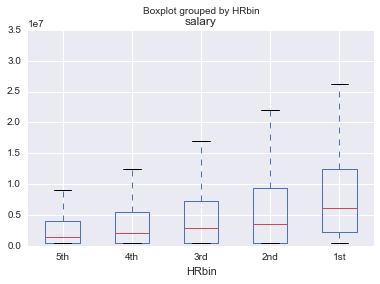

In [214]:
batting_n_salaries_last5yrs.boxplot(column='salary', by='HRbin')

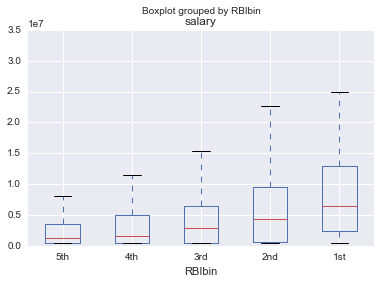

In [215]:
batting_n_salaries_last5yrs.boxplot(column='salary', by='RBIbin')

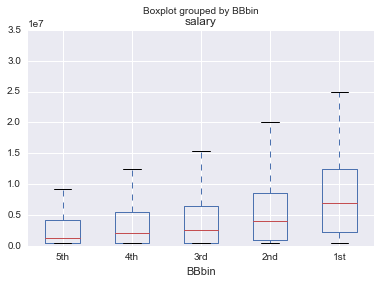

In [216]:
batting_n_salaries_last5yrs.boxplot(column='salary', by='BBbin')

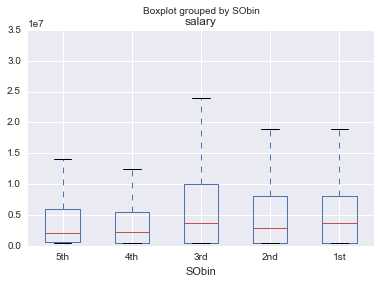

In [217]:
batting_n_salaries_last5yrs.boxplot(column='salary', by='SObin')

##Conclusion 2:
>###Consistent with Pearson's R test for average batting stats and avg. salary, players with batting stats in the first and second quintiles consistently placed above the average salary.


# Alternative approach to find correlation
>Possible Caveat with the previous correlation: a good BA may decline but the associated salary from said BA does not decline due to the length of the contract signed when the BA was at peak--this will dilute the BA against a stable salary and misrepresent the correlation.  

>Thus, an alternative approach is to correlate the maximum salary and maximum BA, with the assumption that the max BA will results in max salary, and that it is very unlikely that a random (fluke) high batting average will result in an increased salary--after all, a maintained improved BA is required to increase the salary.

In [218]:
#function to find maximum value of a certain player 
def max_values(value):
    zz=batting_n_salaries_last5yrs
    return zz.sort_values(by= value, ascending=False).groupby('playerID', as_index=False).first()

#Test function
sorted_batting_salary_max = max_values('salary')
sorted_batting_salary_max.head()

,playerID,yearID,teamID_x,lgID_x,salary,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA,BAbin,HRbin,RBIbin,BBbin,SObin
0,abreubo01,2011,LAA,AL,9000000,1,LAA,AL,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,0.252988,3rd,4th,2nd,1st,2nd
1,abreujo02,2015,CHA,AL,8666000,1,CHA,AL,154,613.0,88.0,178.0,34.0,3.0,30.0,101.0,0.0,0.0,39.0,140.0,11.0,15.0,0.0,1.0,16.0,0.290375,1st,1st,1st,3rd,1st
2,ackledu01,2013,SEA,AL,2700000,1,SEA,AL,113,384.0,40.0,97.0,18.0,2.0,4.0,31.0,2.0,3.0,37.0,72.0,1.0,1.0,4.0,1.0,6.0,0.252604,3rd,5th,4th,3rd,4th
3,adamsma01,2014,SLN,NL,516000,1,SLN,NL,142,527.0,55.0,152.0,34.0,5.0,15.0,68.0,3.0,2.0,26.0,114.0,5.0,3.0,0.0,7.0,9.0,0.288425,1st,2nd,2nd,4th,1st
4,ahmedni01,2015,ARI,NL,508500,1,ARI,NL,134,421.0,49.0,95.0,17.0,6.0,9.0,34.0,4.0,5.0,29.0,81.0,1.0,1.0,5.0,3.0,4.0,0.225653,5th,4th,4th,4th,3rd


Find each player's max values

In [219]:
sorted_batting_BA_max = max_values('BA')
sorted_batting_HR_max = max_values('HR')
sorted_batting_RBI_max = max_values('RBI')
sorted_batting_SO_max = max_values('SO')
sorted_batting_BB_max = max_values('BB')

max_player_salary = sorted_batting_salary_max['salary']
max_player_BA = sorted_batting_BA_max['BA']
max_player_HR = sorted_batting_HR_max['HR']
max_player_RBI = sorted_batting_RBI_max['RBI']
max_player_SO = sorted_batting_SO_max['SO']
max_player_BB = sorted_batting_BB_max['BB']

Rvalue_max_salary_and_BA = correlation(max_player_salary, max_player_BA)
Rvalue_max_salary_and_HR = correlation(max_player_salary, max_player_HR)
Rvalue_max_salary_and_RBI = correlation(max_player_salary, max_player_RBI)
Rvalue_max_salary_and_BB = correlation(max_player_salary, max_player_BB)
Rvalue_max_salary_and_SO = correlation(max_player_salary, max_player_SO)

print "Pearson's R values (max method)"
print 'max salary and BA:', Rvalue_max_salary_and_BA 
print 'max salary and HR:', Rvalue_max_salary_and_HR 
print 'max salary and RBI:', Rvalue_max_salary_and_RBI 
print 'max salary and BB:', Rvalue_max_salary_and_BB 
print 'max salary and SO:', Rvalue_max_salary_and_SO


Pearson's R values (max method)
max salary and BA: 0.473150726826
max salary and HR: 0.568196862407
max salary and RBI: 0.643511772107
max salary and BB: 0.582868632306
max salary and SO: 0.332729224643


In [220]:
print len(sorted_batting_salary_max['playerID'])

573


In [221]:
#function for obtaining t value for Pearson's R values
def correlation_max_sig_test(r):
    sqrtA = math.sqrt(571)
    sqrtB = math.sqrt(1-(r**2))
    return (r * sqrtA)/sqrtB

###<font color='red'>Calculate t values for max salary/batting stats R values
>###<font color='red'>Null hypothesis is existence of correlation (rho): rho = 0
>###<font color='red'>Alternate hypothesis: rho ≠ 0

In [222]:
print "t value for Rvalue_max_salary_and_BA = ", correlation_max_sig_test(Rvalue_max_salary_and_BA)
print "t value for Rvalue_max_ssalary_and_HR = ", correlation_max_sig_test(Rvalue_max_salary_and_HR)
print "t value for Rvalue_max_ssalary_and_RBI = ", correlation_max_sig_test(Rvalue_max_salary_and_RBI)
print "t value for Rvalue_max_ssalary_and_BB = ", correlation_max_sig_test(Rvalue_max_salary_and_BB)
print "t value for Rvalue_max_ssalary_and_SO = ", correlation_max_sig_test(Rvalue_max_salary_and_SO)

t value for Rvalue_max_salary_and_BA =  12.8336674309
t value for Rvalue_max_ssalary_and_HR =  16.4996107307
t value for Rvalue_max_ssalary_and_RBI =  20.0893342245
t value for Rvalue_max_ssalary_and_BB =  17.1407522197
t value for Rvalue_max_ssalary_and_SO =  8.43115336518


###<font color='red'>Results of t test for max salary/batting stats R values: 
>###<font color='red'>Null hypothesis is rejected for all R values above since t critical value for 571 degree of freedom 
>###<font color='red'>for .025 p value(two-tailed test) is between 1.962 and 1.984
>###<font color='red'>Thus, all correlations above are significant

##Conclusion 3:
>###Consistent with the previous Pearson's R test for avg. batting stats and max salary (Pearson's R values rank: RBI > HR > BB > BA > SO), this Pearson's R test for max batting stats and max salary also returns similar rankings in Pearson's R values: RBI > BB > HR > BA > SO, with RBI and HR switching places.  <font color='red'> Using t test, all the correlations are found to be significant (p = 0.05).


##Scatter plots for max values

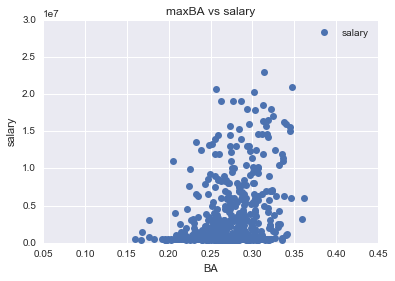

In [223]:
axsmaxBA = sorted_batting_BA_max.plot(x='BA', y='salary', style='o')

axsmaxBA.set_ylim(000000,30000000)
axsmaxBA.set_xlim(0.05,0.45)
axsmaxBA.set_ylabel("salary")
axsmaxBA.set_title('maxBA vs salary')

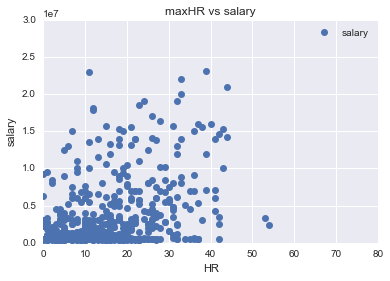

In [224]:
axsmaxHR = sorted_batting_HR_max.plot(x='HR', y='salary', style='o')

axsmaxHR.set_ylim(000000,30000000)
axsmaxHR.set_xlim(0,80)
axsmaxHR.set_ylabel("salary")
axsmaxHR.set_title('maxHR vs salary')

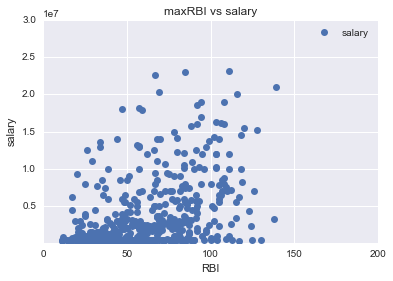

In [225]:
axsmaxRBI = sorted_batting_RBI_max.plot(x='RBI', y='salary', style='o')

axsmaxRBI.set_ylim(100000,30000000)
axsmaxRBI.set_xlim(0,200)
axsmaxRBI.set_ylabel("salary")
axsmaxRBI.set_title('maxRBI vs salary')

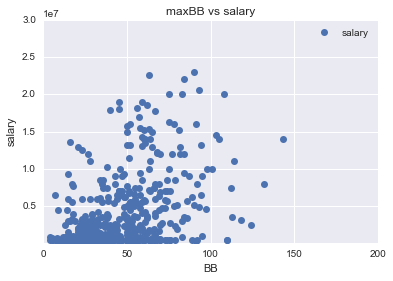

In [226]:
axsmaxBB = sorted_batting_BB_max.plot(x='BB', y='salary', style='o')

axsmaxBB.set_ylim(100000,30000000)
axsmaxBB.set_xlim(0,200)
axsmaxBB.set_ylabel("salary")
axsmaxBB.set_title('maxBB vs salary')

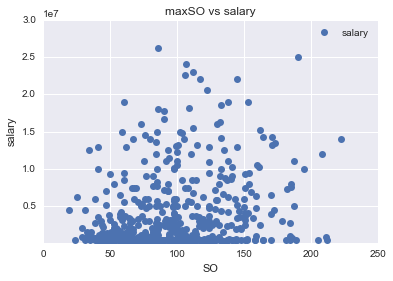

In [227]:
axsmaxSO = sorted_batting_SO_max.plot(x='SO', y='salary', style='o')

axsmaxSO.set_ylim(100000,30000000)
axsmaxSO.set_xlim(0,250)
axsmaxSO.set_ylabel("salary")
axsmaxSO.set_title('maxSO vs salary')

##<font color='red'>As above, binning of batting stats is used to resolve the scatter plot (below).

# Create dataframe with player-specific, matching max batting stats and max salary, for plotting binned values.

In [228]:
#For some reason I need to put the already existing variable assignment below, or the code doesn't work.
sorted_batting_salary_max = max_values('salary')
sorted_batting_BA_max = max_values('BA')
sorted_batting_HR_max = max_values('HR')
sorted_batting_RBI_max = max_values('RBI')
sorted_batting_SO_max = max_values('SO')
sorted_batting_BB_max = max_values('BB')

#function for replacing max values
def replace_max (df, old, new):
    df[old] = df[new]
    del df[new]
    del df['salary']
    return df

def replace_maxsalary (df, old, new):
    df[old] = df[new]
    del df[new]
    return df

replace_maxsalary (sorted_batting_salary_max, 'maxsalary', 'salary')
replace_max (sorted_batting_BA_max, 'maxBA', 'BA')
replace_max (sorted_batting_HR_max, 'maxHR', 'HR')
replace_max (sorted_batting_RBI_max, 'maxRBI', 'RBI')
replace_max (sorted_batting_SO_max, 'maxSO', 'SO')
replace_max (sorted_batting_BB_max, 'maxBB', 'BB')
sorted_batting_salary_max.head()

,playerID,yearID,teamID_x,lgID_x,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA,BAbin,HRbin,RBIbin,BBbin,SObin,maxsalary
0,abreubo01,2011,LAA,AL,1,LAA,AL,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,0.252988,3rd,4th,2nd,1st,2nd,9000000
1,abreujo02,2015,CHA,AL,1,CHA,AL,154,613.0,88.0,178.0,34.0,3.0,30.0,101.0,0.0,0.0,39.0,140.0,11.0,15.0,0.0,1.0,16.0,0.290375,1st,1st,1st,3rd,1st,8666000
2,ackledu01,2013,SEA,AL,1,SEA,AL,113,384.0,40.0,97.0,18.0,2.0,4.0,31.0,2.0,3.0,37.0,72.0,1.0,1.0,4.0,1.0,6.0,0.252604,3rd,5th,4th,3rd,4th,2700000
3,adamsma01,2014,SLN,NL,1,SLN,NL,142,527.0,55.0,152.0,34.0,5.0,15.0,68.0,3.0,2.0,26.0,114.0,5.0,3.0,0.0,7.0,9.0,0.288425,1st,2nd,2nd,4th,1st,516000
4,ahmedni01,2015,ARI,NL,1,ARI,NL,134,421.0,49.0,95.0,17.0,6.0,9.0,34.0,4.0,5.0,29.0,81.0,1.0,1.0,5.0,3.0,4.0,0.225653,5th,4th,4th,4th,3rd,508500


Merge max salary and max batting stats

In [229]:
#function to merge max salary with other max batting matrices dataframe, separately.
def merge_max(df):
    return sorted_batting_salary_max.merge(df, on=['playerID'], how='inner')

batting_n_salaries_maxBA_last5yrs = merge_max(sorted_batting_BA_max)
batting_n_salaries_maxHR_last5yrs = merge_max(sorted_batting_HR_max)
batting_n_salaries_maxRBI_last5yrs = merge_max(sorted_batting_RBI_max)
batting_n_salaries_maxSO_last5yrs = merge_max(sorted_batting_SO_max)
batting_n_salaries_maxBB_last5yrs = merge_max(sorted_batting_BB_max)

batting_n_salaries_maxHR_last5yrs.head()

,playerID,yearID_x,teamID_x_x,lgID_x_x,stint_x,teamID_y_x,lgID_y_x,G_x,AB_x,R_x,H_x,2B_x,3B_x,HR,RBI_x,SB_x,CS_x,BB_x,SO_x,IBB_x,HBP_x,SH_x,SF_x,GIDP_x,BA_x,BAbin_x,HRbin_x,RBIbin_x,BBbin_x,SObin_x,maxsalary,yearID_y,teamID_x_y,lgID_x_y,stint_y,teamID_y_y,lgID_y_y,G_y,AB_y,R_y,H_y,2B_y,3B_y,RBI_y,SB_y,CS_y,BB_y,SO_y,IBB_y,HBP_y,SH_y,SF_y,GIDP_y,BA_y,BAbin_y,HRbin_y,RBIbin_y,BBbin_y,SObin_y,maxHR
0,abreubo01,2011,LAA,AL,1,LAA,AL,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,0.252988,3rd,4th,2nd,1st,2nd,9000000,2010,LAA,AL,1,LAA,AL,154,573.0,88.0,146.0,41.0,1.0,78.0,24.0,10.0,87.0,132.0,3.0,2.0,0.0,5.0,13.0,0.254799,3rd,2nd,1st,1st,1st,20.0
1,abreujo02,2015,CHA,AL,1,CHA,AL,154,613.0,88.0,178.0,34.0,3.0,30.0,101.0,0.0,0.0,39.0,140.0,11.0,15.0,0.0,1.0,16.0,0.290375,1st,1st,1st,3rd,1st,8666000,2014,CHA,AL,1,CHA,AL,145,556.0,80.0,176.0,35.0,2.0,107.0,3.0,1.0,51.0,131.0,15.0,11.0,0.0,4.0,14.0,0.316547,1st,1st,1st,2nd,1st,36.0
2,ackledu01,2013,SEA,AL,1,SEA,AL,113,384.0,40.0,97.0,18.0,2.0,4.0,31.0,2.0,3.0,37.0,72.0,1.0,1.0,4.0,1.0,6.0,0.252604,3rd,5th,4th,3rd,4th,2700000,2014,SEA,AL,1,SEA,AL,143,502.0,64.0,123.0,27.0,4.0,65.0,8.0,4.0,32.0,90.0,1.0,3.0,3.0,2.0,10.0,0.245020,4th,2nd,2nd,3rd,3rd,14.0
3,adamsma01,2014,SLN,NL,1,SLN,NL,142,527.0,55.0,152.0,34.0,5.0,15.0,68.0,3.0,2.0,26.0,114.0,5.0,3.0,0.0,7.0,9.0,0.288425,1st,2nd,2nd,4th,1st,516000,2013,SLN,NL,1,SLN,NL,108,296.0,46.0,84.0,14.0,0.0,51.0,0.0,1.0,23.0,80.0,0.0,0.0,0.0,0.0,9.0,0.283784,2nd,2nd,3rd,4th,3rd,17.0
4,ahmedni01,2015,ARI,NL,1,ARI,NL,134,421.0,49.0,95.0,17.0,6.0,9.0,34.0,4.0,5.0,29.0,81.0,1.0,1.0,5.0,3.0,4.0,0.225653,5th,4th,4th,4th,3rd,508500,2015,ARI,NL,1,ARI,NL,134,421.0,49.0,95.0,17.0,6.0,34.0,4.0,5.0,29.0,81.0,1.0,1.0,5.0,3.0,4.0,0.225653,5th,4th,4th,4th,3rd,9.0


In [230]:
#Use binning funciton to bin batting matrices.
batting_n_salaries_maxBA_last5yrs['maxBAbin'] = binning(batting_n_salaries_maxBA_last5yrs['maxBA'])
batting_n_salaries_maxHR_last5yrs['maxHRbin'] = binning(batting_n_salaries_maxHR_last5yrs['maxHR'])
batting_n_salaries_maxRBI_last5yrs['maxRBIbin'] = binning(batting_n_salaries_maxRBI_last5yrs['maxRBI'])
batting_n_salaries_maxSO_last5yrs['maxSObin'] = binning(batting_n_salaries_maxSO_last5yrs['maxSO'])
batting_n_salaries_maxBB_last5yrs['maxBBbin'] = binning(batting_n_salaries_maxBB_last5yrs['maxBB'])

###<font color='red'>Use binned values to plot (dot plot)

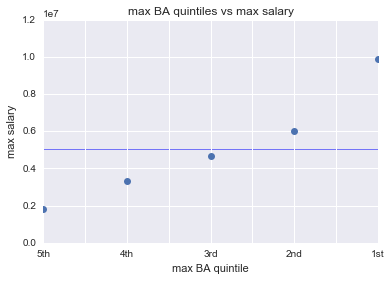

In [232]:
maxsalaryBAbinaxs = batting_n_salaries_maxBA_last5yrs.groupby('maxBAbin').mean()['maxsalary']
axsmaxBAbin = maxsalaryBAbinaxs.plot(x='maxBAbin', y='maxsalary', style='o')

axsmaxBAbin.set_ylim(000000,12000000)
axsmaxBAbin.set_xlabel("max BA quintile")
axsmaxBAbin.set_ylabel("max salary")
axsmaxBAbin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsmaxBAbin.set_title('max BA quintiles vs max salary')

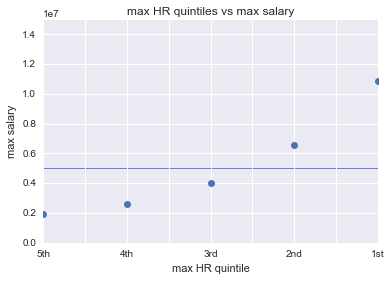

In [233]:
maxsalaryHRbinaxs = batting_n_salaries_maxHR_last5yrs.groupby('maxHRbin').mean()['maxsalary']
axsmaxHRbin = maxsalaryHRbinaxs.plot(x='maxHRbin', y='maxsalary', style='o')

axsmaxHRbin.set_ylim(000000,15000000)
axsmaxHRbin.set_xlabel("max HR quintile")
axsmaxHRbin.set_ylabel("max salary")
axsmaxHRbin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsmaxHRbin.set_title('max HR quintiles vs max salary')

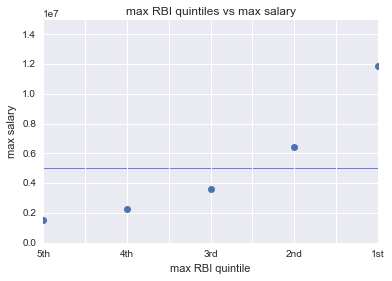

In [234]:
maxsalaryRBIbinaxs = batting_n_salaries_maxRBI_last5yrs.groupby('maxRBIbin').mean()['maxsalary']
axsmaxRBIbin = maxsalaryRBIbinaxs.plot(x='maxRBIbin', y='maxsalary', style='o')

axsmaxRBIbin.set_ylim(000000,15000000)
axsmaxRBIbin.set_xlabel("max RBI quintile")
axsmaxRBIbin.set_ylabel("max salary")
axsmaxRBIbin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsmaxRBIbin.set_title('max RBI quintiles vs max salary')

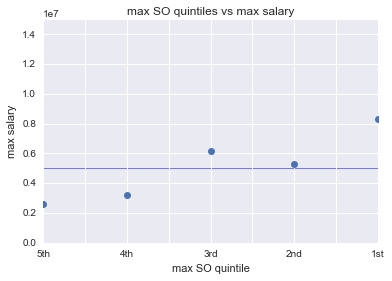

In [235]:
maxsalarySObinaxs = batting_n_salaries_maxSO_last5yrs.groupby('maxSObin').mean()['maxsalary']
axsmaxSObin = maxsalarySObinaxs.plot(x='maxSObin', y='maxsalary', style='o')

axsmaxSObin.set_ylim(000000,15000000)
axsmaxSObin.set_xlabel("max SO quintile")
axsmaxSObin.set_ylabel("max salary")
axsmaxSObin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsmaxSObin.set_title('max SO quintiles vs max salary')

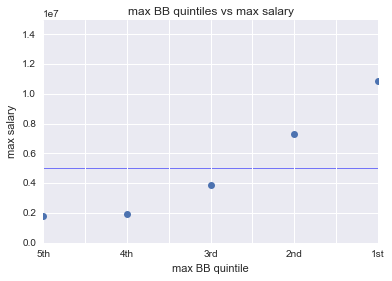

In [236]:
maxsalaryBBbinaxs = batting_n_salaries_maxBB_last5yrs.groupby('maxBBbin').mean()['maxsalary']
axsmaxBBbin = maxsalaryBBbinaxs.plot(x='maxBBbin', y='maxsalary', style='o')

axsmaxBBbin.set_ylim(000000,15000000)
axsmaxBBbin.set_xlabel("max BB quintile")
axsmaxBBbin.set_ylabel("max salary")
axsmaxBBbin.axhline(y=5050966.57435,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axsmaxBBbin.set_title('max BB quintiles vs max salary')

###<font color='red'> Use binned values to plot (box plot)

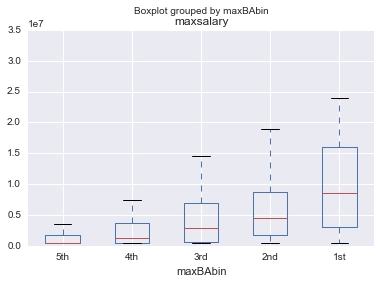

In [237]:
#boxplotBAbin = maxsalaryBAbinaxs(['maxsalary','maxBAbin'])
# XXX = batting_n_salaries_maxBA_last5yrs.groupby('maxBAbin').T
# XXX.boxplot(column = 'maxsalary')
# df2 = batting_n_salaries_maxBA_last5yrs.pivot(columns=batting_n_salaries_maxBA_last5yrs.columns[maxBAbin], index=batting_n_salaries_maxBA_last5yrs.index)
# df2.columns = df2.columns.droplevel()
# df2.boxplot()
#grouped = batting_n_salaries_maxBA_last5yrs['maxsalary'].groupby(level='maxBAbin').T
batting_n_salaries_maxBA_last5yrs.boxplot(column='maxsalary', by='maxBAbin')
# data.boxplot(column='2013-08-17',by='SPECIES')

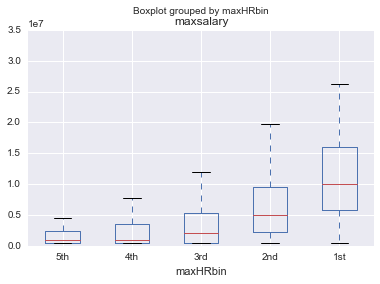

In [238]:
batting_n_salaries_maxHR_last5yrs.boxplot(column='maxsalary', by='maxHRbin')

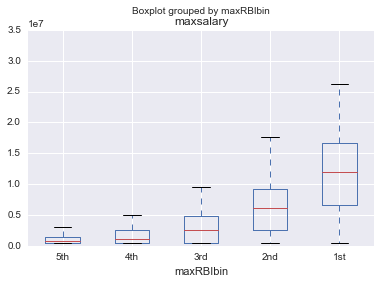

In [239]:
batting_n_salaries_maxRBI_last5yrs.boxplot(column='maxsalary', by='maxRBIbin')

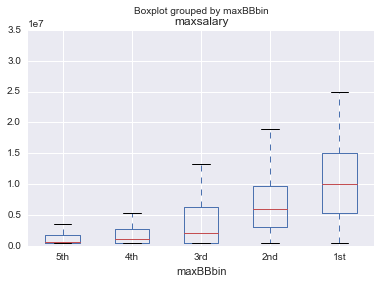

In [240]:
batting_n_salaries_maxBB_last5yrs.boxplot(column='maxsalary', by='maxBBbin')

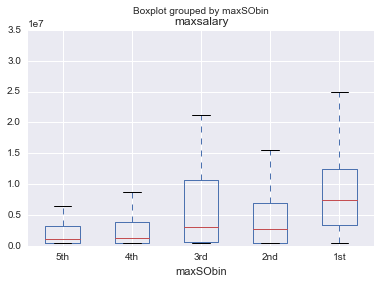

In [241]:
batting_n_salaries_maxSO_last5yrs.boxplot(column='maxsalary', by='maxSObin')

##Conclusion 4:
>###Consistent with both 1.) Pearson's R test for max batting stats and max salary, and 2.) binned plots for avg. batting stats/salary,  the max batting stats in the first and second quintiles consistently placed in the above max salary.


##Final conclusion:
>###It is reproducibly demonstrated, via binned batting stats vs. salary plot, that higher the Pearson's R test values results in a stronger correlation between the tested batting stat's impact on salary.  <font color='red'>In addition, all the correlations tested are significant (p = 0.05).<font color='black'>  However, depending on how the batting stats data are processed for Pearson's R test (in this case, avg. values vs. max values),there may be slight differences in the ranking.  This excercise indicates that some stats has a higher correlation with salary amount than other stats.  It is also consistent with realworld baseball in that a stat such as strikeouts(SO) has the lowest Pearson's R test values since SO is a negative performance stat.  <font color='red'> As above, this does not indicate that having higher said stat in isolation will directly result in higher salary, since other stats are not constant for each player while this analysis was performed, as well as unforseen events not detected in our data/tests.

#<font color='red'>Future Directions: 
>##<font color='red'>It would be interesting to ask how effective are the player batting stats, in the context of the population's average batting stats and per salary basis.
>##<font color='red'>For example, we can try to use the formula below ,where the absolute value of standardized salary is divided by standardized batting stats, to give arbitrary unit for the positive/negative performance of the player's batting stats, per the amount of money paid.

###<font color='red'>Code used for calculating batting stats efficienacy for each batting data entry.

In [177]:
xSalary = batting_n_salaries_last5yrs['salary']
yBA = batting_n_salaries_last5yrs['BA']
yHR = batting_n_salaries_last5yrs['HR']
yRBI = batting_n_salaries_last5yrs['RBI']
batting_n_salaries_last5yrs['BA_cost_Unit'] = abs((((xSalary-xSalary.mean())/xSalary.std(ddof=0))))/ ((yBA-yBA.mean())/yBA.std(ddof=0))
batting_n_salaries_last5yrs['HR_cost_Unit'] = abs((((xSalary-xSalary.mean())/xSalary.std(ddof=0))))/ ((yHR-yHR.mean())/yHR.std(ddof=0))
batting_n_salaries_last5yrs['RBI_cost_Unit'] = abs((((xSalary-xSalary.mean())/xSalary.std(ddof=0))))/ ((yRBI-yRBI.mean())/yRBI.std(ddof=0))
batting_n_salaries_last5yrs.head()

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA,BA_per_$,HR_per_$,RBI_per_$,BA_cost_Unit,HR_cost_Unit,RBI_cost_Unit
0,2010,ARI,NL,drewst01,3400000,1,ARI,NL,151,565.0,83.0,157.0,33.0,12.0,15.0,61.0,10.0,5.0,62.0,108.0,2.0,3.0,2.0,1.0,7.0,0.277876,0.273680,1.630362,0.800172,0.523144,1.276856,0.894523
1,2010,ARI,NL,johnske05,2350000,1,ARI,NL,154,585.0,93.0,166.0,36.0,5.0,26.0,71.0,13.0,7.0,79.0,148.0,1.0,2.0,3.0,2.0,12.0,0.283761,0.411713,0.113655,0.431947,0.641648,0.337128,0.657227
2,2010,ARI,NL,larocad01,4500000,1,ARI,NL,151,560.0,75.0,146.0,37.0,2.0,25.0,100.0,0.0,1.0,48.0,172.0,4.0,3.0,0.0,4.0,8.0,0.260714,43.828413,0.005542,0.002664,6.620303,0.074446,0.051612
3,2010,ARI,NL,montemi01,2000000,1,ARI,NL,85,297.0,36.0,79.0,20.0,2.0,9.0,43.0,0.0,1.0,29.0,71.0,3.0,2.0,0.0,3.0,10.0,0.265993,8.801977,1.654756,1.872549,2.966813,-1.286373,-1.368411
4,2010,ARI,NL,parrage01,405500,1,ARI,NL,133,364.0,31.0,95.0,19.0,6.0,3.0,30.0,1.0,0.0,23.0,76.0,10.0,2.0,3.0,1.0,8.0,0.260989,1230.880171,0.592225,0.806514,35.083902,-0.769562,-0.898061
